In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

C:\Users\chewbacca2019\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\chewbacca2019\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\chewbacca2019\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\chewbacca2019\anaconda3\envs\mlenv\lib\s

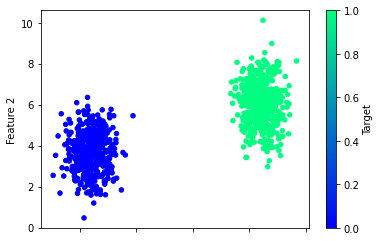

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
750/750 [==============================] - 0s 528us/sample - loss: 0.5264 - acc: 0.9333
Epoch 2/100
750/750 [==============================] - 0s 81us/sample - loss: 0.5114 - acc: 0.9867
Epoch 3/100
750/750 [==============================] - 0s 92us/sample - loss: 0.4962 - acc: 0.9920
Epoch 4/100
750/750 [==============================] - 0s 80us/sample - loss: 0.4812 - acc: 0.9947
Epoch 5/100
750/750 [==============================] - 0s 95us/sample - loss: 0.4663 - acc: 0.9960
Epoch 6/100
750/750 [==============================] - 0s 92us/sample - loss: 0.4519 - acc: 0.9987
Epoch 7/100
750/750 [==============================] - 0s 75us/sample - loss: 0.4378 - acc: 0.9987
Epoch 8/100
750/750 [==============================] - 0s 91us/sample - loss: 0.4242 - acc: 1.0000
Epoch 9/100
750/750 [==============================] - 0s 99us/sample - loss: 0.4110 - acc: 1.0000
Epoch 10/100
750/750 [==============================] - 0s 99us/sample - loss: 0.3983 - acc: 1.0000
Epoch 11

750/750 [==============================] - 0s 96us/sample - loss: 0.0905 - acc: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 84us/sample - loss: 0.0891 - acc: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 69us/sample - loss: 0.0877 - acc: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 72us/sample - loss: 0.0864 - acc: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 71us/sample - loss: 0.0851 - acc: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 68us/sample - loss: 0.0839 - acc: 1.0000
Epoch 88/100
750/750 [==============================] - 0s 68us/sample - loss: 0.0826 - acc: 1.0000
Epoch 89/100
750/750 [==============================] - 0s 89us/sample - loss: 0.0814 - acc: 1.0000
Epoch 90/100
750/750 [==============================] - 0s 91us/sample - loss: 0.0802 - acc: 1.0000
Epoch 91/100
750/750 [==============================] - 0s 81us/sample - loss: 0.0791 - acc: 1.0000
Epoch 92/100


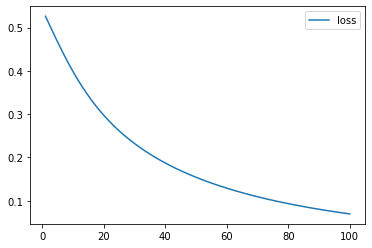

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

KeyError: 'accuracy'

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.0653 - acc: 1.0000
Loss: 0.06534017860889435, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

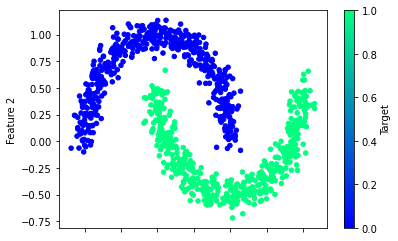

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 85us/sample - loss: 0.7942 - acc: 0.6413
Epoch 2/100
750/750 [==============================] - 0s 107us/sample - loss: 0.7036 - acc: 0.6600
Epoch 3/100
750/750 [==============================] - 0s 95us/sample - loss: 0.6438 - acc: 0.6747
Epoch 4/100
750/750 [==============================] - 0s 93us/sample - loss: 0.6014 - acc: 0.6893
Epoch 5/100
750/750 [==============================] - 0s 96us/sample - loss: 0.5711 - acc: 0.6987
Epoch 6/100
750/750 [==============================] - 0s 96us/sample - loss: 0.5468 - acc: 0.7120
Epoch 7/100
750/750 [==============================] - 0s 95us/sample - loss: 0.5275 - acc: 0.7307
Epoch 8/100
750/750 [==============================] - 0s 117us/sample - loss: 0.5108 - acc: 0.7373
Epoch 9/100
750/750 [==============================] - 0s 91us/sample - loss: 0.4963 - acc: 0.7400
Epoch 10/100
750/750 [==============================] - 0s 88us/sample - loss: 0.4840 - acc: 0.7480
Epoch 1

750/750 [==============================] - 0s 92us/sample - loss: 0.2641 - acc: 0.8920
Epoch 83/100
750/750 [==============================] - 0s 84us/sample - loss: 0.2638 - acc: 0.8920
Epoch 84/100
750/750 [==============================] - 0s 80us/sample - loss: 0.2636 - acc: 0.8920
Epoch 85/100
750/750 [==============================] - 0s 85us/sample - loss: 0.2633 - acc: 0.8920
Epoch 86/100
750/750 [==============================] - 0s 69us/sample - loss: 0.2631 - acc: 0.8920
Epoch 87/100
750/750 [==============================] - 0s 68us/sample - loss: 0.2628 - acc: 0.8920
Epoch 88/100
750/750 [==============================] - 0s 72us/sample - loss: 0.2626 - acc: 0.8920
Epoch 89/100
750/750 [==============================] - 0s 91us/sample - loss: 0.2624 - acc: 0.8920
Epoch 90/100
750/750 [==============================] - 0s 127us/sample - loss: 0.2622 - acc: 0.8920
Epoch 91/100
750/750 [==============================] - 0s 77us/sample - loss: 0.2619 - acc: 0.8920
Epoch 92/100

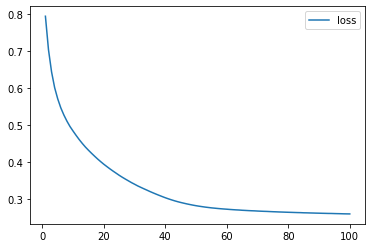

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

In [19]:
# Plot the loss
history_df.plot(y="accuracy")

KeyError: 'accuracy'

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.a# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

AttributeError: 'Sequential' object has no attribute 'a'

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 617us/sample - loss: 6.2379 - acc: 0.4507
Epoch 2/100
750/750 [==============================] - 0s 57us/sample - loss: 6.2379 - acc: 0.4507
Epoch 3/100
750/750 [==============================] - 0s 65us/sample - loss: 6.2379 - acc: 0.4507
Epoch 4/100
750/750 [==============================] - 0s 57us/sample - loss: 6.2379 - acc: 0.4507
Epoch 5/100
750/750 [==============================] - 0s 58us/sample - loss: 6.2379 - acc: 0.4507
Epoch 6/100
750/750 [==============================] - 0s 60us/sample - loss: 6.2379 - acc: 0.4507
Epoch 7/100
750/750 [==============================] - 0s 101us/sample - loss: 6.2379 - acc: 0.4507
Epoch 8/100
750/750 [==============================] - 0s 116us/sample - loss: 6.2379 - acc: 0.4507
Epoch 9/100
750/750 [==============================] - 0s 267us/sample - loss: 6.2379 - acc: 0.4507
Epoch 10/100
750/750 [==============================] - 0s 113us/sample - loss: 6.2379 - acc: 0.4507
Epoc

750/750 [==============================] - 0s 101us/sample - loss: 6.2379 - acc: 0.4507
Epoch 83/100
750/750 [==============================] - 0s 61us/sample - loss: 6.2379 - acc: 0.4507
Epoch 84/100
750/750 [==============================] - 0s 49us/sample - loss: 6.2379 - acc: 0.4507
Epoch 85/100
750/750 [==============================] - 0s 53us/sample - loss: 6.2379 - acc: 0.4507
Epoch 86/100
750/750 [==============================] - 0s 52us/sample - loss: 6.2379 - acc: 0.4507
Epoch 87/100
750/750 [==============================] - 0s 59us/sample - loss: 6.2379 - acc: 0.4507
Epoch 88/100
750/750 [==============================] - 0s 56us/sample - loss: 6.2379 - acc: 0.4507
Epoch 89/100
750/750 [==============================] - 0s 65us/sample - loss: 6.2379 - acc: 0.4507
Epoch 90/100
750/750 [==============================] - 0s 58us/sample - loss: 6.2379 - acc: 0.4507
Epoch 91/100
750/750 [==============================] - 0s 53us/sample - loss: 6.2379 - acc: 0.4507
Epoch 92/100